In [25]:
#data used from kaggle link: https://www.kaggle.com/datasets/lokeshparab/amazon-products-dataset/code

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import mplcursors

In [26]:
df = pd.read_csv('Cameras.csv')

DATA CLEANING

In [27]:
#Check whether there is any null data
df.isna().sum()

name                 0
main_category        0
sub_category         0
image                0
link                 0
ratings           1145
no_of_ratings     1145
discount_price     396
actual_price       115
dtype: int64

In [28]:
# check unique values in Dataframe
df.nunique()

name              9144
main_category        1
sub_category         1
image             8958
link              9600
ratings             42
no_of_ratings     1229
discount_price    2363
actual_price      1372
dtype: int64

In [29]:
df['discount_price'] = df['discount_price'].str.replace("₹","")
df['actual_price'] = df['actual_price'].str.replace("₹","")

In [30]:
df['discount_price'] = df["discount_price"].str.replace(',', '').astype(float)
df["actual_price"] = df["actual_price"].str.replace(',', '').astype(float)

In [31]:
df['ratings'].unique()

array(['4.4', '4.3', '3.3', '3.8', '3.6', '4.2', '3.7', '3.9', '4.5',
       '4.0', '4.6', '4.1', '3.4', '5.0', '4.7', '2.9', '3.5', '3.2',
       '3.0', '4.9', '1.3', '4.8', '2.8', '2.2', '3.1', '1.7', 'Get', nan,
       '1.5', '1.0', '2.6', '2.3', '2.7', '2.5', '2.4', '2.0', '1.9',
       '1.8', '2.1', 'FREE', '1.4', '1.6', '1.2'], dtype=object)

In [32]:
df['ratings']=df['ratings'].replace(['Get'], 0.0)
df['ratings']=df['ratings'].replace(['FREE'], 0.0)

In [33]:
df['ratings']=df['ratings'].astype(float)

In [34]:
df['ratings'].unique()

array([4.4, 4.3, 3.3, 3.8, 3.6, 4.2, 3.7, 3.9, 4.5, 4. , 4.6, 4.1, 3.4,
       5. , 4.7, 2.9, 3.5, 3.2, 3. , 4.9, 1.3, 4.8, 2.8, 2.2, 3.1, 1.7,
       0. , nan, 1.5, 1. , 2.6, 2.3, 2.7, 2.5, 2.4, 2. , 1.9, 1.8, 2.1,
       1.4, 1.6, 1.2])

In [35]:
df['ratings'].describe()

count    8455.000000
mean        3.818675
std         0.888246
min         0.000000
25%         3.500000
50%         4.000000
75%         4.300000
max         5.000000
Name: ratings, dtype: float64

In [36]:
df['no_of_ratings'] = df['no_of_ratings'].astype(str)
df['correct_no_of_ratings'] = pd.Series([df['no_of_ratings'][x][0].isdigit() for x in range(len(df['no_of_ratings']))])

In [37]:
df.tail(4)

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,correct_no_of_ratings
9596,Childplaymate g5_3_4_8 Dimmable 50 Watts LED P...,"tv, audio & cameras",Cameras,https://m.media-amazon.com/images/I/51745+VqL6...,https://www.amazon.in/Childplaymate-Dimmable-S...,3.9,310,1414.0,2799.0,True
9597,Gosky 20-60x60 HD Spotting Scope with Tripod,"tv, audio & cameras",Cameras,https://m.media-amazon.com/images/I/71SSY9SXQh...,https://www.amazon.in/Gosky-20-60x60-Spotting-...,4.2,"2,966",11990.0,22990.0,True
9598,Ubersweet® 20mm DIV=1 CAT911 Eyepiece Micromet...,"tv, audio & cameras",Cameras,https://m.media-amazon.com/images/I/31sAK6M1TL...,https://www.amazon.in/Ubersweet%C2%AE-Micromet...,NaN,nan,5249.0,10497.0,False
9599,AmScope EP10X23R WF10X Microscope Eyepiece wit...,"tv, audio & cameras",Cameras,https://m.media-amazon.com/images/I/61d38KeTSf...,https://www.amazon.in/AmScope-EP10X23R-Microsc...,4.6,34,NaN,7967.0,True


In [38]:
df = df[df['correct_no_of_ratings'] == True]
df['correct_no_of_ratings'].value_counts()

correct_no_of_ratings
True    8301
Name: count, dtype: int64

In [39]:
df=df.dropna(subset=['actual_price','discount_price'])

In [40]:
df["no_of_ratings"] = df["no_of_ratings"].str.replace(',', '')

In [41]:
df["no_of_ratings"].astype(float)

0        71768.0
1       142840.0
2        71768.0
3        71768.0
4        53251.0
          ...   
9592        22.0
9593       450.0
9594         1.0
9596       310.0
9597      2966.0
Name: no_of_ratings, Length: 7962, dtype: float64

In [42]:
df['discount'] = ((df['actual_price'] - df['discount_price']) / df['actual_price'] ) * 100

In [43]:
df['discount'] = df['discount'].round(2)
df.head(10)

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,correct_no_of_ratings,discount
0,"SanDisk Ultra® microSDXC™ UHS-I Card, 64GB, 14...","tv, audio & cameras",Cameras,https://m.media-amazon.com/images/I/7180ZAZmER...,https://www.amazon.in/SanDisk-Ultra%C2%AE-micr...,4.4,71768,488.0,1000.0,True,51.20
1,Samsung EVO Plus 128GB microSDXC UHS-I U3 130M...,"tv, audio & cameras",Cameras,https://m.media-amazon.com/images/I/61fkOHNmzp...,https://www.amazon.in/Samsung-microSDXC-Memory...,4.3,142840,889.0,2699.0,True,67.06
2,"SanDisk Ultra® microSDXC™ UHS-I Card, 128GB, 1...","tv, audio & cameras",Cameras,https://m.media-amazon.com/images/I/71jsEFJtRR...,https://www.amazon.in/SanDisk-Ultra%C2%AE-micr...,4.4,71768,868.0,1800.0,True,51.78
3,"SanDisk Ultra microSD UHS-I Card 32GB, 120MB/s R","tv, audio & cameras",Cameras,https://m.media-amazon.com/images/I/61MHVeEPw3...,https://www.amazon.in/SanDisk-Ultra-microSD-UH...,4.4,71768,369.0,700.0,True,47.29
4,Tygot Adjustable Aluminium Alloy Tripod Stand ...,"tv, audio & cameras",Cameras,https://m.media-amazon.com/images/I/51jx8hycZU...,https://www.amazon.in/Tygot-Adjustable-Alumini...,3.3,53251,329.0,1999.0,True,83.54
5,Samsung EVO Plus 64GB microSDXC UHS-I U1 130MB...,"tv, audio & cameras",Cameras,https://m.media-amazon.com/images/I/61rnCkrurx...,https://www.amazon.in/Samsung-microSDXC-Memory...,4.3,142840,489.0,1899.0,True,74.25
6,MI Xiaomi Wireless Home Security Camera 2i 202...,"tv, audio & cameras",Cameras,https://m.media-amazon.com/images/I/51hkb1CYem...,https://www.amazon.in/MI-Wireless-Security-Det...,4.3,46362,2960.0,4499.0,True,34.21
7,"Tygot 10 Inches Big LED Ring Light for Camera,...","tv, audio & cameras",Cameras,https://m.media-amazon.com/images/I/61YAs1cH9x...,https://www.amazon.in/Tygot-YouTube-Shooting-F...,3.8,13949,699.0,1999.0,True,65.03
9,CP PLUS 2MP Full HD Smart Wi-f CCTV Home Secur...,"tv, audio & cameras",Cameras,https://m.media-amazon.com/images/I/31Nk80-hUU...,https://www.amazon.in/CP-PLUS-Security-Distanc...,3.6,1467,1692.0,3700.0,True,54.27
10,"Syvo WT 3130 Aluminum Tripod (50 Inches), Univ...","tv, audio & cameras",Cameras,https://m.media-amazon.com/images/I/61H1dMNTSn...,https://www.amazon.in/Syvo-3130-Aluminum-Unive...,4.3,28644,799.0,3990.0,True,79.97


In [45]:
df['manufacturer_name']=df['name'].str.split(' ').str[0]

df.tail(4)

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,correct_no_of_ratings,discount,manufacturer_name
9593,Coku (CKBG8X12) 100 Percent Pure Polyester Wri...,"tv, audio & cameras",Cameras,https://m.media-amazon.com/images/I/311+t+HeVh...,https://www.amazon.in/CKBG8X12-Polyester-Resis...,3.5,450,489.0,1199.0,True,59.22,Coku
9594,"HIFFIN® Metal 1/4"" to 3/8"" Tripod Convert Scre...","tv, audio & cameras",Cameras,https://m.media-amazon.com/images/I/610M6jmP4j...,https://www.amazon.in/HIFFIN%C2%AE-Convert-Ada...,5.0,1,999.0,1500.0,True,33.40,HIFFIN®
9596,Childplaymate g5_3_4_8 Dimmable 50 Watts LED P...,"tv, audio & cameras",Cameras,https://m.media-amazon.com/images/I/51745+VqL6...,https://www.amazon.in/Childplaymate-Dimmable-S...,3.9,310,1414.0,2799.0,True,49.48,Childplaymate
9597,Gosky 20-60x60 HD Spotting Scope with Tripod,"tv, audio & cameras",Cameras,https://m.media-amazon.com/images/I/71SSY9SXQh...,https://www.amazon.in/Gosky-20-60x60-Spotting-...,4.2,2966,11990.0,22990.0,True,47.85,Gosky


In [49]:
manufacturer_counts = df['manufacturer_name'].value_counts().reset_index()
pd.set_option('display.max_rows', None)
print(manufacturer_counts)

                manufacturer_name  count
0                          SHOPEE    230
1                         HIFFIN®    158
2                              CP    157
3                          Action    156
4                        Boltove®    136
5                       HIKVISION    119
6                        Fujifilm     97
7                         SanDisk     86
8                        DIGITEK®     83
9                       Yantralay     63
10                     TECHNOVIEW     61
11                          Godox     61
12                        WELBORN     58
13                          Nikon     53
14                          Osaka     50
15                            VTS     49
16                      Celestron     49
17                        Hanumex     44
18                           PKST     42
19                       SAVIAURA     42
20                            FND     41
21                     BlueRigger     40
22                        Boosty®     38
23              

In [46]:
df[['actual_price','manufacturer_name']].groupby('manufacturer_name').mean().round(2).sort_values(by='actual_price',ascending=True)

,actual_price
manufacturer_name,
GoBagee®,54.00
SOOTRA,63.50
INSIGNIA,99.00
10K,99.00
Vaishnavi,99.00
...,...
Boss,108333.00
Mijia,154999.00
TAMRON,164000.00


DATA VISUALIZATION

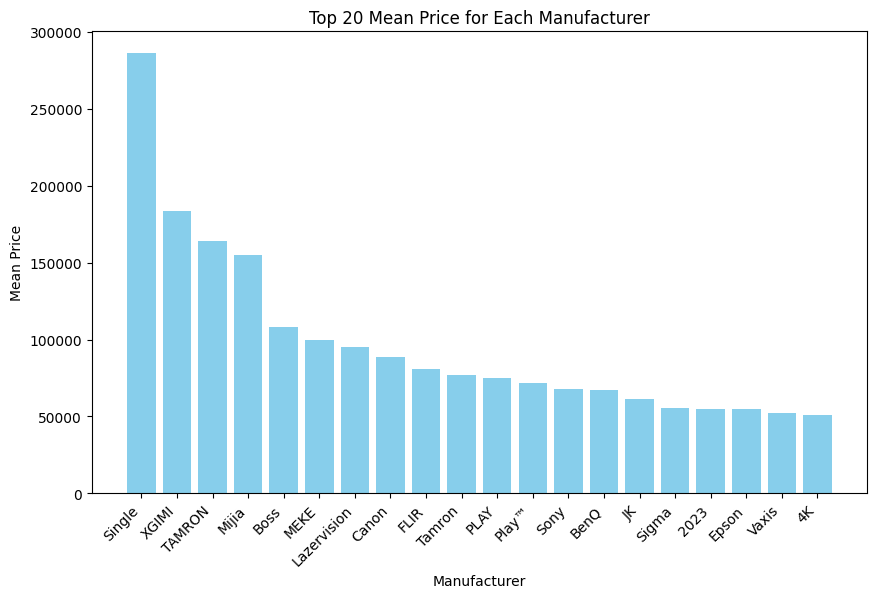

In [57]:
mean_prices = df.groupby('manufacturer_name')['actual_price'].mean().reset_index()

# Sort by mean price in descending order
mean_prices = mean_prices.sort_values(by='actual_price', ascending=False)

# Select the top 20
mean_prices_top20 = mean_prices.head(20)

plt.figure(figsize=(10, 6))
plt.bar(mean_prices_top20['manufacturer_name'], mean_prices_top20['actual_price'], color='skyblue')
plt.xlabel('Manufacturer')
plt.ylabel('Mean Price')
plt.title('Top 20 Mean Price for Each Manufacturer')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()